# Explore here

In [108]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn import tree




In [87]:
df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv",sep=",")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
df.duplicated().sum()

np.int64(0)

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


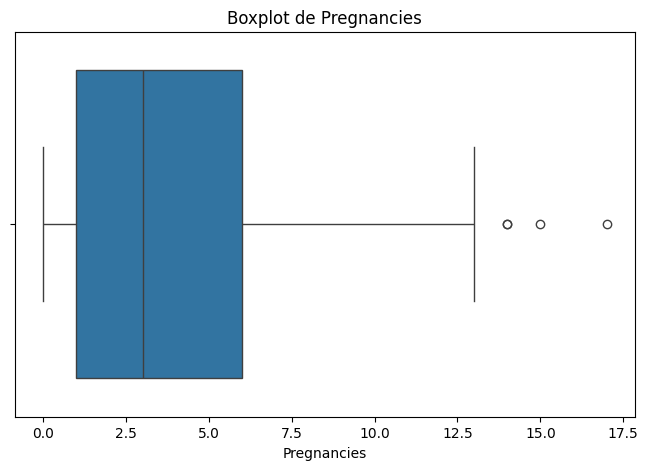

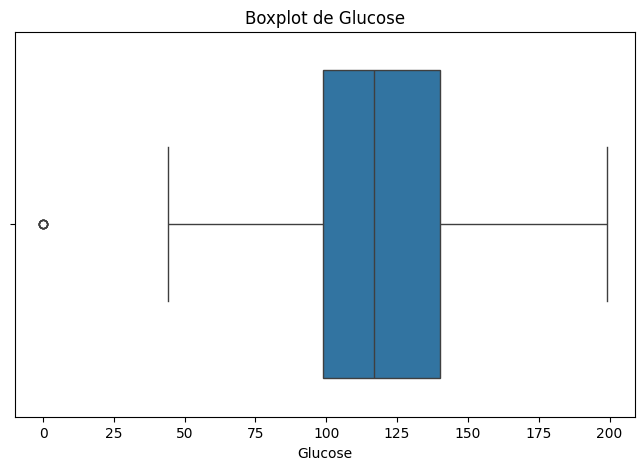

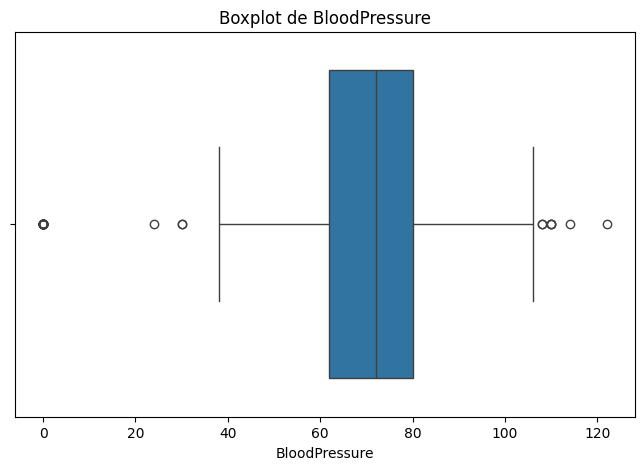

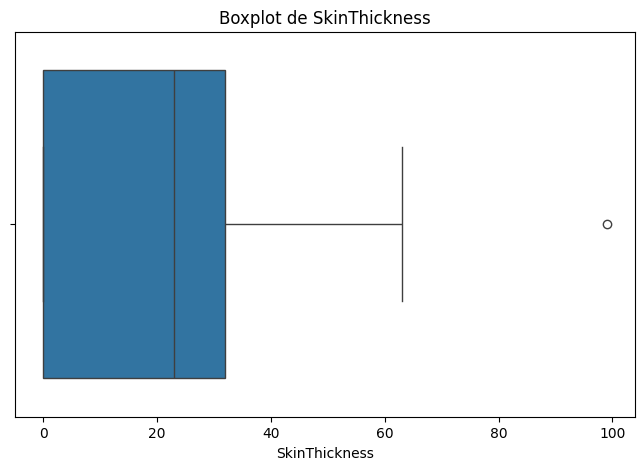

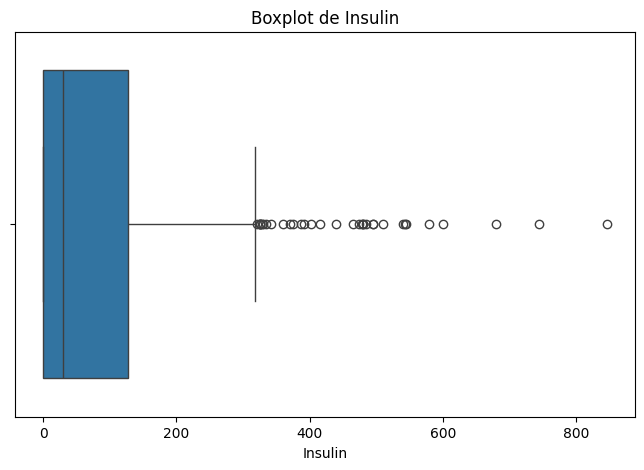

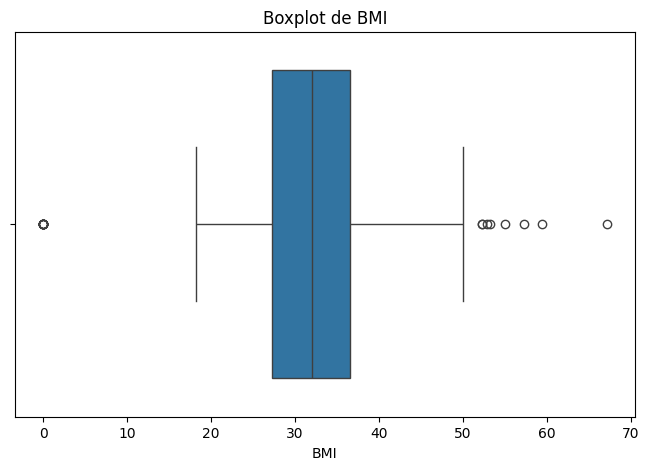

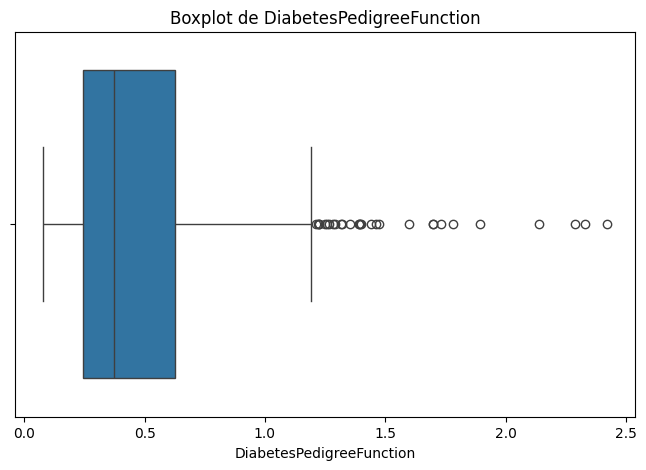

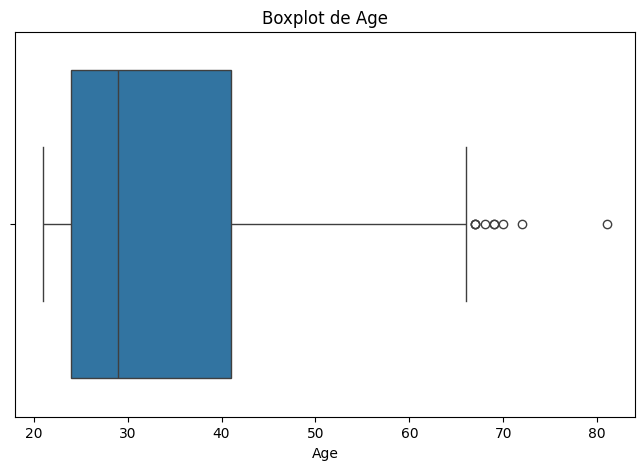

In [91]:
for col in df.columns[:-1]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()

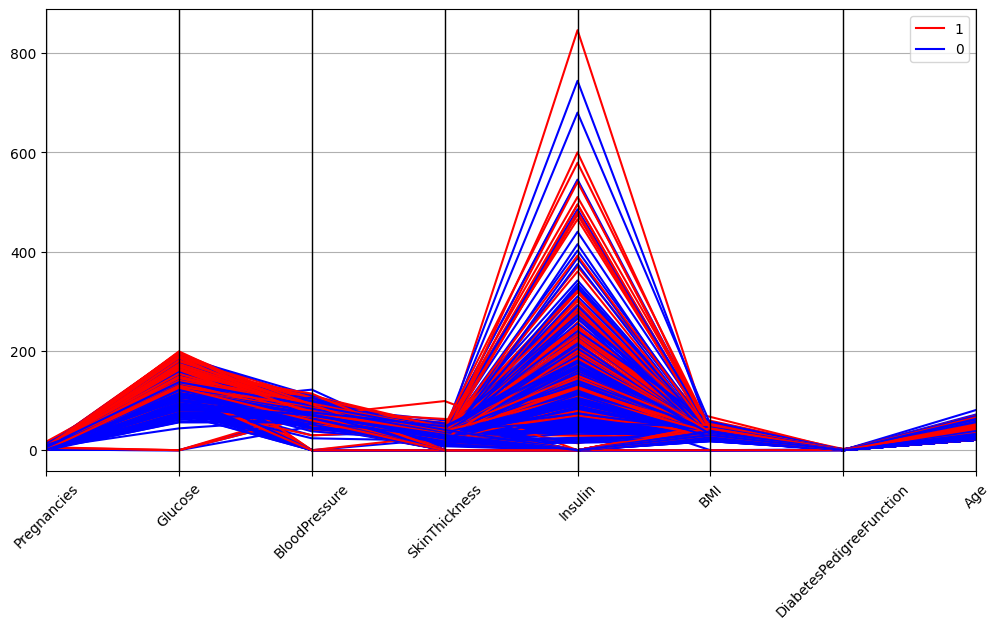

In [92]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

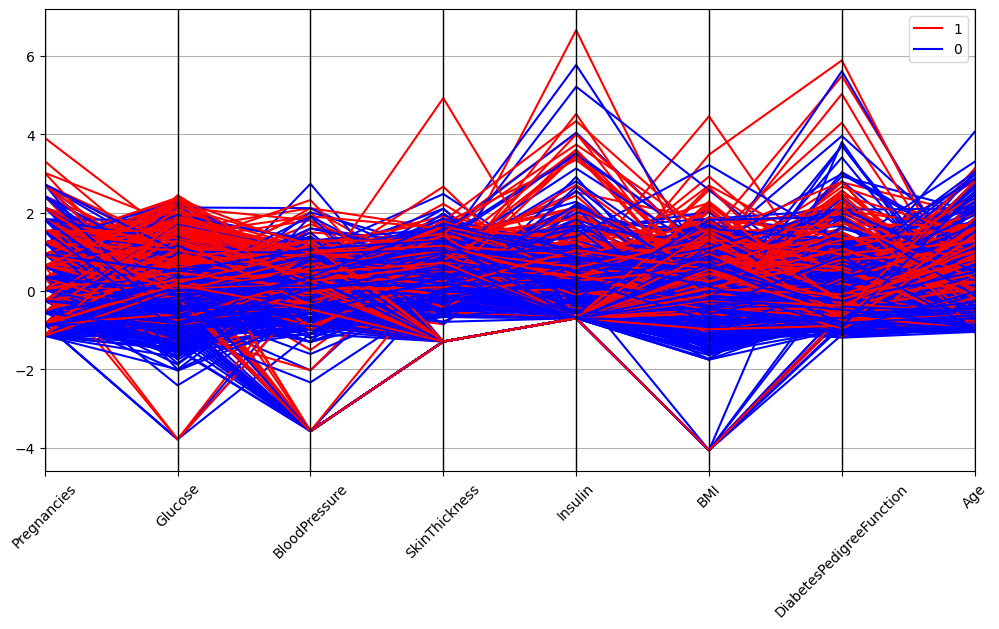

In [93]:
df_sc = pd.DataFrame(data=StandardScaler().fit_transform(df.drop(['Outcome'], axis=1)), columns=df.columns[:-1])
df_sc['Outcome'] = df.Outcome
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df_sc, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()


In [94]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']


In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [96]:
rand_Forest_simple=RandomForestClassifier(n_estimators=5, random_state=42, max_depth=2, min_samples_leaf=20, max_features=X_train.shape[1]//2).fit(X_train,y_train)
rand_Forest_complex=RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20, min_samples_leaf=1, max_features=int(X_train.shape[1]*0.8)).fit(X_train,y_train)

In [97]:
y_pred_train_simple=rand_Forest_simple.predict(X_train)
y_pred_test_simple=rand_Forest_simple.predict(X_test)

y_pred_train_complex=rand_Forest_complex.predict(X_train)
y_pred_test_complex=rand_Forest_complex.predict(X_test)


In [98]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [99]:
get_metrics(y_train,y_test,y_pred_train_simple,y_pred_test_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.765472,0.588571,0.699390,0.751825,0.483568,0.915212
Test,0.792208,0.659574,0.741414,0.794872,0.563636,0.919192
Diferencia,-0.026735,-0.071003,-0.042024,-0.043047,-0.080068,-0.003980


In [100]:
# overfitting
get_metrics(y_train,y_test,y_pred_train_complex,y_pred_test_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test,0.746753,0.654867,0.730303,0.637931,0.672727,0.787879
Diferencia,0.253247,0.345133,0.269697,0.362069,0.327273,0.212121


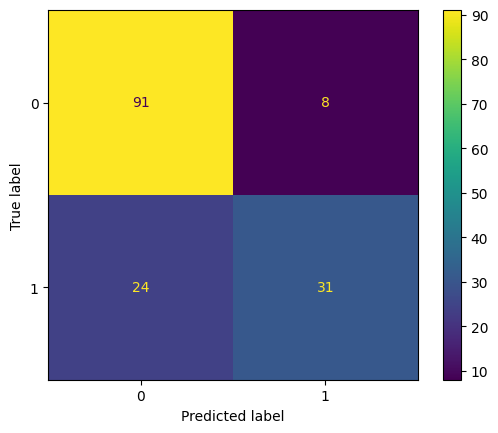

In [101]:
confusion=confusion_matrix(y_test,y_pred_test_simple)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['0', '1'])
disp.plot()

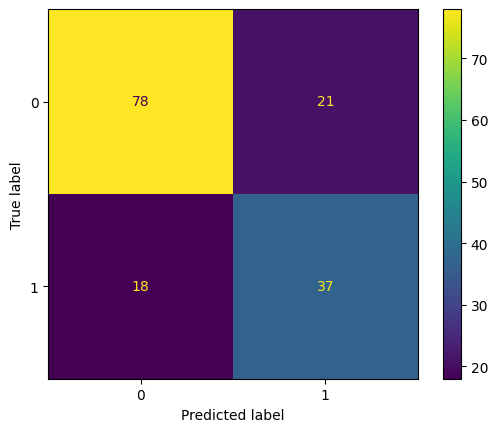

In [102]:
confusion=confusion_matrix(y_test,y_pred_test_complex)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['0', '1'])
disp.plot()

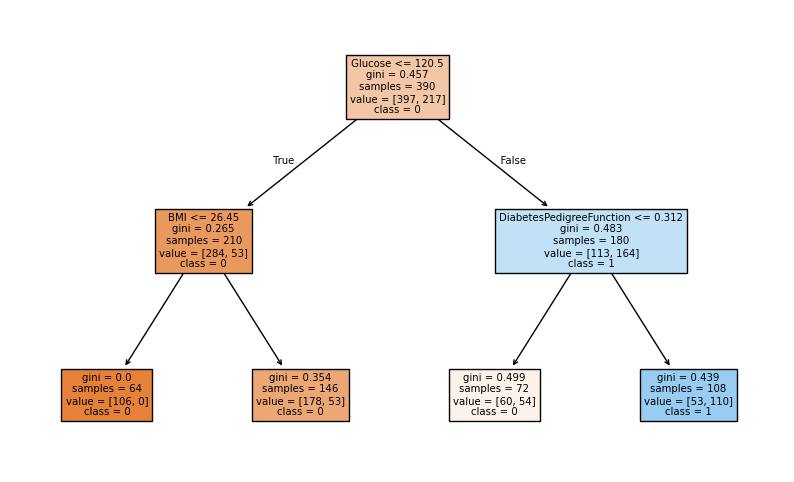

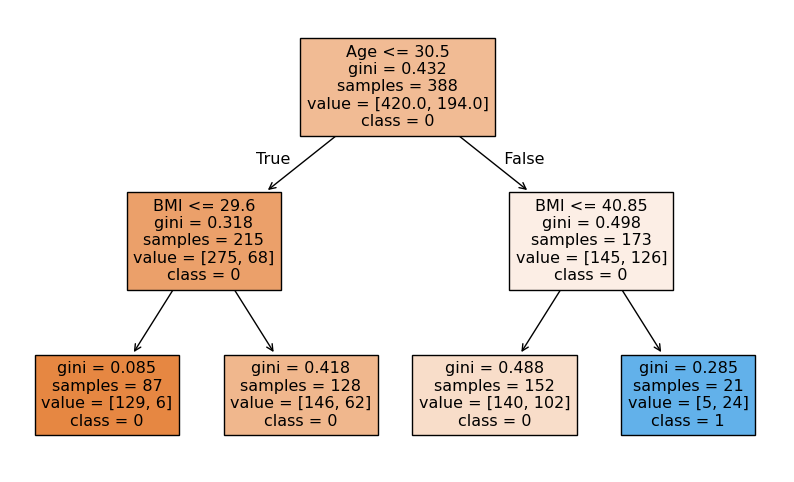

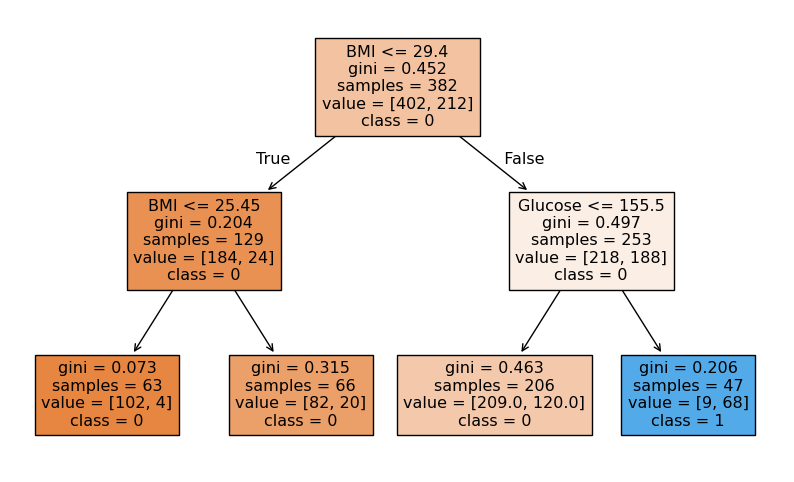

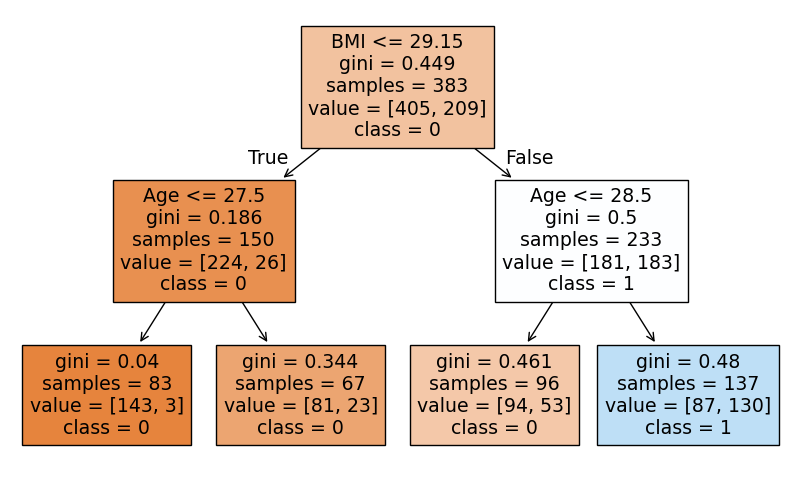

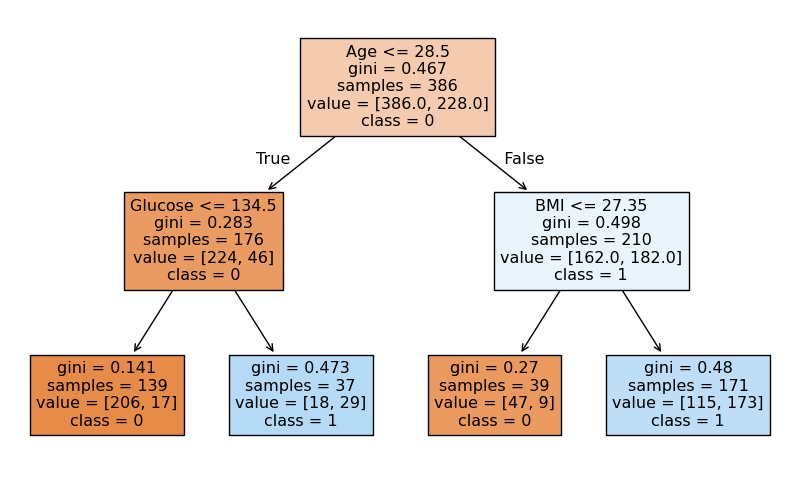

In [123]:
for i in range(len(rand_Forest_simple.estimators_)):
    plt.figure(figsize=(10,6))
    tree.plot_tree(rand_Forest_simple.estimators_[i], feature_names=X_train.columns, class_names=['0', '1'], filled=True)
    plt.show()